In [7]:
import numpy as np
import pandas as pd

# PMF of a die
X_values = np.arange(1,7)
p_X = np.ones(6)/6

# Define scenarios
A1 = X_values <= 3
A2 = X_values >= 4

# Conditional PMFs
p_X_A1 = p_X[A1]/p_X[A1].sum()  # normalize
p_X_A2 = p_X[A2]/p_X[A2].sum()

# Conditional expectations
E_X_A1 = (X_values[A1] * p_X_A1).sum()
E_X_A2 = (X_values[A2] * p_X_A2).sum()

# Probabilities of scenarios
P_A1 = p_X[A1].sum()
P_A2 = p_X[A2].sum()

# Total expectation
E_X = P_A1 * E_X_A1 + P_A2 * E_X_A2

print(f"E[X | A1]: {E_X_A1}, E[X | A2]: {E_X_A2}")
print(f"Total expectation E[X]: {E_X} (should be 3.5)")


E[X | A1]: 2.0, E[X | A2]: 5.0
Total expectation E[X]: 3.5 (should be 3.5)


In [12]:
# Parameters
n = 10
p = 0.3

# Variance formula for Binomial
var_X = n * p * (1 - p)
sd_X = np.sqrt(var_X)
print(f"Variance: {var_X}, Standard Deviation: {sd_X}")

# Simulation to check
np.random.seed(42)
simulated_X = np.random.binomial(n, p, 100000)
print(f"Simulated Variance: {simulated_X.var():.3f}, SD: {simulated_X.std():.3f}")


Variance: 2.0999999999999996, Standard Deviation: 1.4491376746189437
Simulated Variance: 2.087, SD: 1.445


In [13]:
# Conditional variances for die example
var_X_A1 = ((X_values[A1] - E_X_A1)**2 * p_X_A1).sum()
var_X_A2 = ((X_values[A2] - E_X_A2)**2 * p_X_A2).sum()

# Total variance using law of total variance
total_var = P_A1 * var_X_A1 + P_A2 * var_X_A2 + P_A1*P_A2*(E_X_A1 - E_X_A2)**2
print(f"Conditional variances: {var_X_A1:.2f}, {var_X_A2:.2f}")
print(f"Total variance: {total_var:.2f}")


Conditional variances: 0.67, 0.67
Total variance: 2.92


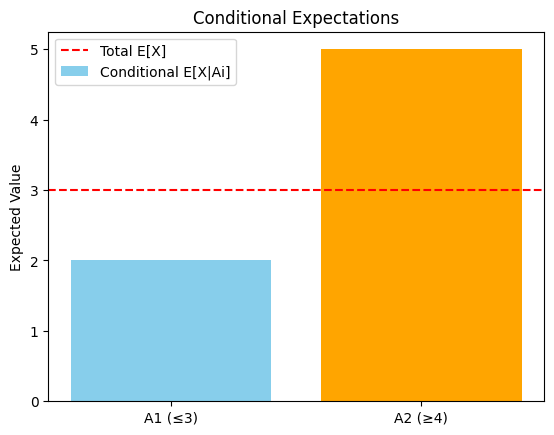

In [14]:
import matplotlib.pyplot as plt

# Conditional expectation bars
plt.bar([1,2], [E_X_A1, E_X_A2], color=['skyblue','orange'], label='Conditional E[X|Ai]')
plt.axhline(E_X, color='red', linestyle='--', label='Total E[X]')
plt.xticks([1,2], ['A1 (≤3)','A2 (≥4)'])
plt.ylabel('Expected Value')
plt.title('Conditional Expectations')
plt.legend()
plt.show()


Joint PMF Table:
           1         2         3         4         5         6
1  0.027778  0.027778  0.027778  0.027778  0.027778  0.027778
2  0.027778  0.027778  0.027778  0.027778  0.027778  0.027778
3  0.027778  0.027778  0.027778  0.027778  0.027778  0.027778
4  0.027778  0.027778  0.027778  0.027778  0.027778  0.027778
5  0.027778  0.027778  0.027778  0.027778  0.027778  0.027778
6  0.027778  0.027778  0.027778  0.027778  0.027778  0.027778


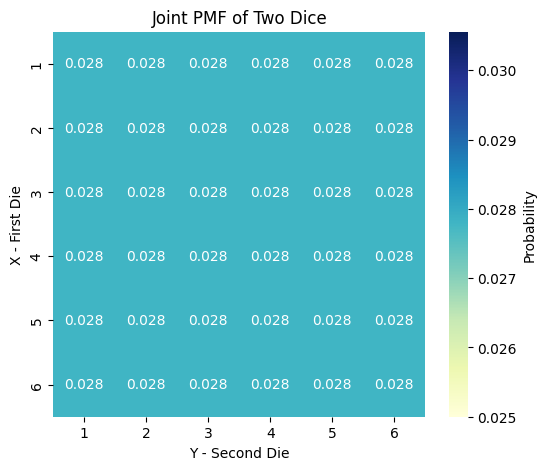

Marginal PMF of X:
 1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.166667
6    0.166667
dtype: float64
Marginal PMF of Y:
 1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.166667
6    0.166667
dtype: float64


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Values for two dice
x_values = np.arange(1, 7)
y_values = np.arange(1, 7)

# Joint PMF (uniform)
joint_pmf = np.ones((6,6)) / 36

# Display as a DataFrame
df = pd.DataFrame(joint_pmf, index=x_values, columns=y_values)
print("Joint PMF Table:\n", df)

# Heatmap for visualization
plt.figure(figsize=(6,5))
sns.heatmap(df, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Probability'})
plt.xlabel("Y - Second Die")
plt.ylabel("X - First Die")
plt.title("Joint PMF of Two Dice")
plt.show()

# Marginal PMFs
p_X = df.sum(axis=1)
p_Y = df.sum(axis=0)

print("Marginal PMF of X:\n", p_X)
print("Marginal PMF of Y:\n", p_Y)


PMF of Z = X + Y:
 2     0.027778
3     0.055556
4     0.083333
5     0.111111
6     0.138889
7     0.166667
8     0.138889
9     0.111111
10    0.083333
11    0.055556
12    0.027778
dtype: float64


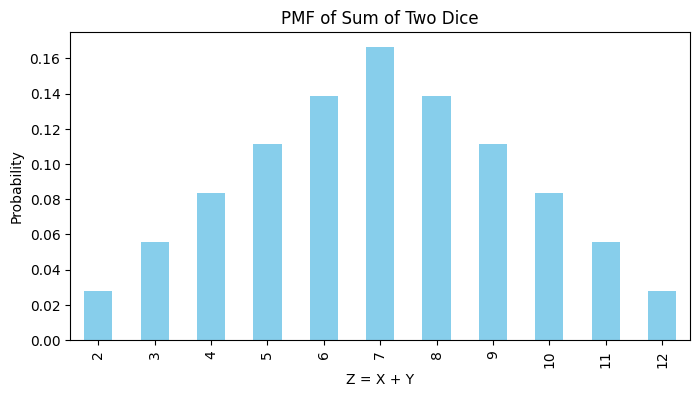

In [9]:
# Possible sums
sums = {}
for x in x_values:
    for y in y_values:
        z = x + y
        sums[z] = sums.get(z, 0) + joint_pmf[x-1, y-1]

# Display PMF of Z
pmf_Z = pd.Series(sums).sort_index()
print("PMF of Z = X + Y:\n", pmf_Z)

# Plot PMF of Z
pmf_Z.plot(kind='bar', color='skyblue', figsize=(8,4))
plt.xlabel("Z = X + Y")
plt.ylabel("Probability")
plt.title("PMF of Sum of Two Dice")
plt.show()


Expected value of Binomial(10, 0.3): 3.0
Simulated mean: 3.002


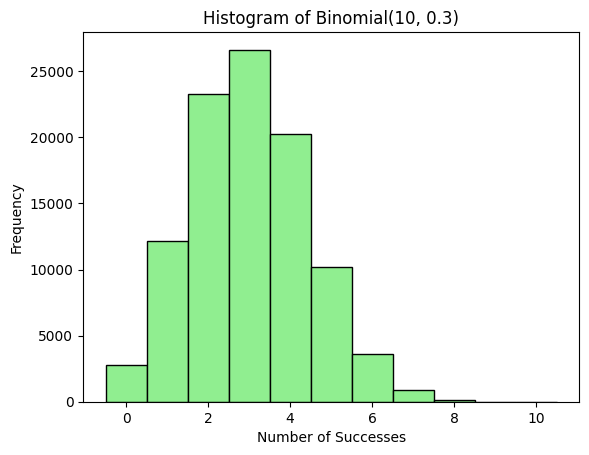

In [10]:
# Parameters
n = 10
p = 0.3

# Expected value using formula
E_X = n * p
print(f"Expected value of Binomial({n}, {p}): {E_X}")

# Simulate using indicator variables
np.random.seed(42)
trials = np.random.binomial(1, p, (100000, n))
simulated_X = trials.sum(axis=1)
print(f"Simulated mean: {simulated_X.mean():.3f}")

# Plot histogram
plt.hist(simulated_X, bins=np.arange(n+2)-0.5, color='lightgreen', edgecolor='black')
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title(f"Histogram of Binomial({n}, {p})")
plt.show()


In [11]:
# Compute E[Z] using joint PMF
E_Z = sum(x * y * joint_pmf[x-1, y-1] for x in x_values for y in y_values)
print(f"Expected value of Z = X*Y: {E_Z}")


Expected value of Z = X*Y: 12.250000000000002


Conditional Expectations
E[X | A1]: 2.0, E[X | A2]: 5.0
Total E[X] via Total Expectation: 3.5 (should be 3.5)


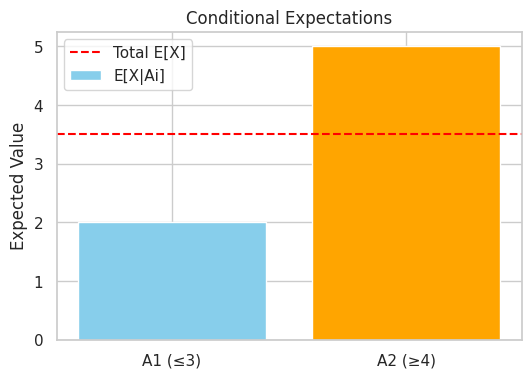


Linearity of Expectation
E[X+Y] = 6.94, E[X]+E[Y] = 6.94

Binomial Random Variable (n=10, p=0.3)
Expected Value (theory): 3.0
Expected Value (simulation): 2.94


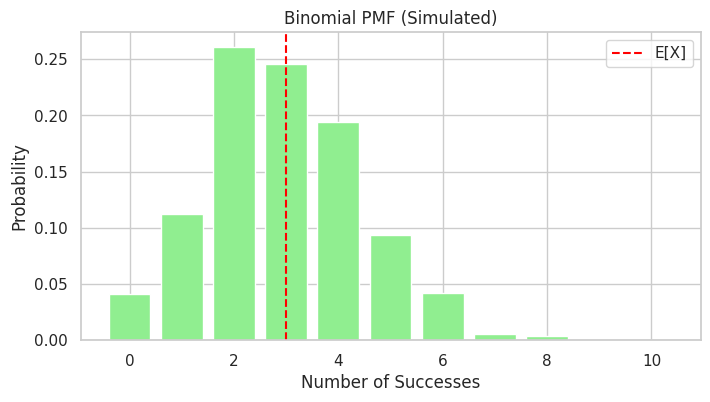


Binomial Variance (theory): 2.0999999999999996, SD: 1.45
Binomial Variance (simulation): 2.22, SD: 1.49

Conditional Variance Example
Var(X|A1): 0.67, Var(X|A2): 0.67
Total Var(X): 2.92 (should be close to 35/12 ≈ 2.92)


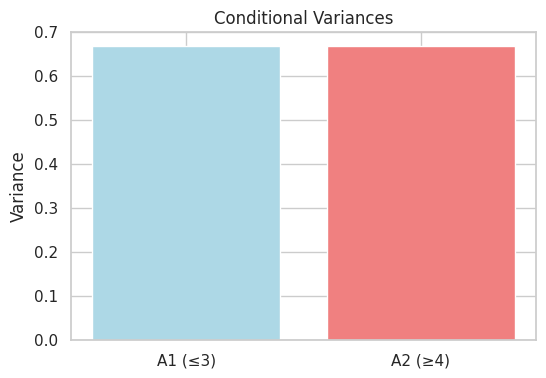

In [15]:
# Lecture 6: Expectations, Conditional Expectation, Variance

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# ---------------------------
# 1. Random Variable PMF (Die Example)
# ---------------------------
X_values = np.arange(1,7)
p_X = np.ones(6)/6

# ---------------------------
# 2. Conditional Expectation
# ---------------------------
A1 = X_values <= 3
A2 = X_values >= 4

p_X_A1 = p_X[A1]/p_X[A1].sum()
p_X_A2 = p_X[A2]/p_X[A2].sum()

E_X_A1 = (X_values[A1] * p_X_A1).sum()
E_X_A2 = (X_values[A2] * p_X_A2).sum()

P_A1 = p_X[A1].sum()
P_A2 = p_X[A2].sum()

E_X_total = P_A1*E_X_A1 + P_A2*E_X_A2

print("Conditional Expectations")
print(f"E[X | A1]: {E_X_A1}, E[X | A2]: {E_X_A2}")
print(f"Total E[X] via Total Expectation: {E_X_total} (should be 3.5)")

# Visualization: Conditional Expectations
plt.figure(figsize=(6,4))
plt.bar([1,2], [E_X_A1, E_X_A2], color=['skyblue','orange'], label='E[X|Ai]')
plt.axhline(E_X_total, color='red', linestyle='--', label='Total E[X]')
plt.xticks([1,2], ['A1 (≤3)','A2 (≥4)'])
plt.ylabel('Expected Value')
plt.title('Conditional Expectations')
plt.legend()
plt.show()

# ---------------------------
# 3. Linearity of Expectation
# ---------------------------
# Example: sum of two independent variables
X = np.random.randint(1,7, size=1000)
Y = np.random.randint(1,7, size=1000)

print("\nLinearity of Expectation")
print(f"E[X+Y] = {np.mean(X+Y):.2f}, E[X]+E[Y] = {np.mean(X)+np.mean(Y):.2f}")

# ---------------------------
# 4. Binomial Random Variable
# ---------------------------
n, p = 10, 0.3
# Using indicator variables
X_indicators = np.random.binomial(1, p, size=(1000,n))
X_sum = X_indicators.sum(axis=1)

print("\nBinomial Random Variable (n=10, p=0.3)")
print(f"Expected Value (theory): {n*p}")
print(f"Expected Value (simulation): {X_sum.mean():.2f}")

# PMF Visualization
counts = np.bincount(X_sum, minlength=n+1)/len(X_sum)
plt.figure(figsize=(8,4))
plt.bar(range(n+1), counts, color='lightgreen')
plt.axvline(n*p, color='red', linestyle='--', label='E[X]')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial PMF (Simulated)')
plt.legend()
plt.show()

# ---------------------------
# 5. Variance and Standard Deviation
# ---------------------------
var_X = n*p*(1-p)
sd_X = np.sqrt(var_X)
print(f"\nBinomial Variance (theory): {var_X}, SD: {sd_X:.2f}")
print(f"Binomial Variance (simulation): {X_sum.var():.2f}, SD: {X_sum.std():.2f}")

# ---------------------------
# 6. Conditional Variance Example (Die)
# ---------------------------
var_X_A1 = ((X_values[A1]-E_X_A1)**2 * p_X_A1).sum()
var_X_A2 = ((X_values[A2]-E_X_A2)**2 * p_X_A2).sum()

total_var = P_A1*var_X_A1 + P_A2*var_X_A2 + P_A1*P_A2*(E_X_A1-E_X_A2)**2
print("\nConditional Variance Example")
print(f"Var(X|A1): {var_X_A1:.2f}, Var(X|A2): {var_X_A2:.2f}")
print(f"Total Var(X): {total_var:.2f} (should be close to 35/12 ≈ 2.92)")

# Visualization: Conditional Variance
plt.figure(figsize=(6,4))
plt.bar([1,2], [var_X_A1, var_X_A2], color=['lightblue','lightcoral'], label='Conditional Var(X|Ai)')
plt.ylabel('Variance')
plt.xticks([1,2], ['A1 (≤3)','A2 (≥4)'])
plt.title('Conditional Variances')
plt.show()
